In [1]:
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import numpy as np
from tkinter import *
from PIL import Image, ImageTk, ImageFont, ImageDraw
import serial
import time
import datetime

# data_dir = 'd:/Katalog 1/Science/Projekt lasery/mikroskop/raw_mikro_data/'

In [2]:
command = b'GET 1\n'

In [3]:
ser.write(command)
resp = ser.readline()

NameError: name 'ser' is not defined

In [4]:
formatted = resp.decode('utf-8') 
c_str = formatted.split(',')[0]
current = float(c_str[c_str.find('=')+1:])
s_str = formatted.split(',')[1]
t_set = float(s_str[s_str.find('=')+1:])

NameError: name 'resp' is not defined

In [5]:
def connect_to_thermal(com_i, timeout = 3):
    ser = serial.Serial()
    ser.baudrate = 9600
    ser.port='COM%d'%com_i
    ser.timeout = 3

    try:
        ser.open()    
        time.sleep(4)
        command = b'WHO 1\n'
        ser.write(command)
        resp = ser.readline()
        formatted = resp.decode('utf-8')
        if formatted == 'thermal\r\n': 
            print('Connected to thermal on COM%d'%com_i)
            return ser
        else:
            print('COM%d is not thermal')
            return None
    except:
        print('Device on COM%d is not available'%com_i)
        return None

    
def thermal_get_temps(ser):
    command = b'GET 1\n'
    ser.write(command)
    resp = ser.readline()
    formatted = resp.decode('utf-8') 
    c_str = formatted.split(',')[0]
    current = float(c_str[c_str.find('=')+1:])
    s_str = formatted.split(',')[1]
    t_set = float(s_str[s_str.find('=')+1:])
    return current, t_set


def thermal_set_temps(ser, temperature):    
    command = 'SET %d'%temperature
    command = bytes(command, 'utf-8')
    ser.write(command)

In [14]:
ser = connect_to_thermal(7)


Connected to thermal on COM7


In [18]:
thermal_get_temps(ser)

(52.0, 40.0)

In [11]:
func = lambda:213+1

In [13]:
func()

214

In [15]:
thermal_set_temps(ser, 40)

In [12]:
ser.close()

In [14]:
parameters_panel.shape

(200, 800, 3)

In [32]:
parameters_panel = np.zeros((200, 800, 3), np.uint8)
parameters_panel[:,:] = (250, 250, 250)

In [40]:
text = 'temperature = %d°C\n'%120
text += 'polarizator = %2.2f\n'%float('23.23')
text += 'objective = %s\n'%'X5'

img_pil = Image.fromarray(parameters_panel)
draw = ImageDraw.Draw(img_pil)
draw.text((0, 0), text, fill = (10, 10, 10))
img = np.array(img_pil)

# textsize = cv2.getTextSize(text, font, 0.5, 1)[0]
# textX = int(20)
# textY = int(20 + textsize[1])
# parameters_panel = cv2.putText(parameters_panel, text, (textX, textY), font , 0.5, (10, 10, 10), 1, cv2.LINE_AA)

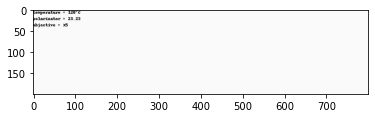

In [41]:
plt.imshow(img)

## grbl tests

In [31]:
def connect_to_grbl(com_i, timeout = 3):
    ser = serial.Serial()
    ser.baudrate = 115200
    ser.port='COM%d'%com_i
    ser.timeout = timeout
    
    try:
        ser.open()    
        resp = ser.read(32)
        if resp == b"\r\nGrbl 0.9j ['$' for help]\r\n": 
            print('Connected to grbl on COM%d'%com_i)
            return ser
        else:
            print('COM%d is not grbl')
            return None
    except:
        print('Device on COM%d is not available'%com_i)
        return None
    
    
def send_to_grbl(ser, command, maxlen = 64):
    ser.write(command)
    full_response = b''
    resp = b''
    i = 0
    start = time.time()
    while (resp != b'ok\r\n') and (i < maxlen) and ((time.time()-start)<5):
        resp = ser.readline()
        full_response += resp
        i += 1
        
    return full_response

In [32]:
ser = connect_to_grbl(4)

Connected to grbl on COM4


In [36]:
c = send_to_grbl(ser, b'?\n')

In [38]:
str(c)

"b'<Run,WPos:0.132,0.198,0.000>\\r\\nok\\r\\n'"

In [6]:
send_to_grbl(ser, b'$21=0\n')

b'ok\r\n'

In [34]:
# send_to_grbl(ser, b'G21 G90 X-0.0 Y0.0 F5\n')
send_to_grbl(ser, b'G21 G91 G1 X1.0 Y1.5 F2\n')

b'ok\r\n'

In [7]:
resp = send_to_grbl(ser, b'$$\n')
ls = str(resp).split('\\r\\n')
for l in ls:
    print(l)

b'$0=33 (step pulse, usec)
$1=41 (step idle delay, msec)
$2=33 (step port invert mask:00100001)
$3=0 (dir port invert mask:00000000)
$4=0 (step enable invert, bool)
$5=1 (limit pins invert, bool)
$6=0 (probe pin invert, bool)
$10=2 (status report mask:00000010)
$11=399376.064 (junction deviation, mm)
$12=0.000 (arc tolerance, mm)
$13=0 (report inches, bool)
$20=0 (soft limits, bool)
$21=0 (hard limits, bool)
$22=0 (homing cycle, bool)
$23=77 (homing dir invert mask:01001101)
$24=15.000 (homing feed, mm/min)
$25=15.000 (homing seek, mm/min)
$26=55 (homing debounce, msec)
$27=0.000 (homing pull-off, mm)
$100=25600.000 (x, step/mm)
$101=25600.000 (y, step/mm)
$102=64000.000 (z, step/mm)
$110=500.000 (x max rate, mm/min)
$111=500.000 (y max rate, mm/min)
$112=500.000 (z max rate, mm/min)
$120=10.000 (x accel, mm/sec^2)
$121=10.000 (y accel, mm/sec^2)
$122=10.000 (z accel, mm/sec^2)
$130=200.000 (x max travel, mm)
$131=200.000 (y max travel, mm)
$132=-0.000 (z max travel, mm)
ok
'


In [46]:
send_to_grbl(ser, b'$H\n')

b'error: Setting disabled\r\n'

In [7]:
resp = str(send_to_grbl(ser, b'?\n'))

In [8]:
resp

"b'<Idle,WPos:-0.400,0.500,0.000>\\r\\nok\\r\\n'"

In [8]:
ser.close()

In [52]:
[f for f in resp[resp.find('WPos:')+5:resp.find('>\\r\\nok')].split(',')]

['-0.100', '0.100', '0.000']

In [47]:
resp[resp.find('WPos:')+5:resp.find('>\r\nok')]

TypeError: argument should be integer or bytes-like object, not 'str'

In [48]:
resp.find('WPos:')

TypeError: argument should be integer or bytes-like object, not 'str'

In [14]:
send_to_grbl(ser, b'G21G90\n')

b'ok\r\n'

In [2]:
ser = serial.Serial()
ser.baudrate = 115200
ser.port='COM%d'%8
ser.timeout = 5

ser.open()
ser.read(64)

b"\r\nGrbl 0.9j ['$' for help]\r\n"

In [37]:
ser.reset_input_buffer()

In [4]:
ser.write(b'$#\n')
# ser.readline()
# ser.read(64)
resp = b'okok'
while (resp != b'ok\r\n'):
    resp = ser.readline()
    print(resp)

b'[G54:-5.000,-4.000,0.000]\r\n'
b'[G55:0.000,0.000,0.000]\r\n'
b'[G56:0.000,0.000,0.000]\r\n'
b'[G57:0.000,0.000,0.000]\r\n'
b'[G58:0.000,0.000,0.000]\r\n'
b'[G59:0.000,0.000,0.000]\r\n'
b'[G28:0.000,0.000,0.000]\r\n'
b'[G30:0.000,0.000,0.000]\r\n'
b'[G92:0.000,0.000,0.000]\r\n'
b'[TLO:0.000]\r\n'
b'[PRB:0.000,0.000,0.000:0]\r\n'
b'ok\r\n'


In [5]:
ser.write(b'$#\n')
full_response = b''
resp = b''
while (resp != b'ok\r\n'):
    resp = ser.readline()
    full_response += resp
    
full_response

b'[G54:-5.000,-4.000,0.000]\r\n[G55:0.000,0.000,0.000]\r\n[G56:0.000,0.000,0.000]\r\n[G57:0.000,0.000,0.000]\r\n[G58:0.000,0.000,0.000]\r\n[G59:0.000,0.000,0.000]\r\n[G28:0.000,0.000,0.000]\r\n[G30:0.000,0.000,0.000]\r\n[G92:0.000,0.000,0.000]\r\n[TLO:0.000]\r\n[PRB:0.000,0.000,0.000:0]\r\nok\r\n'

In [53]:
ser.close()

In [52]:
resp = b'<Idle,MPos:-5.000,-3.500,0.000,WPos:0.000,0.500,0.000>\r\nok\r\n'.decode('ascii')

In [62]:
x,y,z = [float(f) for f in resp[resp.find('WPos:')+5:resp.find('>\r\nok')].split(',')]
x

0.0

In [37]:
bytes('G21 G91 G1 X-0.0 Y0.1 F10\n', encoding = 'utf-8')

b'G21 G91 G1 X-0.0 Y0.1 F10\n'

In [63]:
ts1 = time.time()

for i in range(0, 1000000000):
    a = 12323*213

ts2 = time.time()

print(ts2-ts1)

59.09897470474243


In [70]:
words = 'Jamnik – jedna z ras psów pochodząca z Niemiec. Niemiecka nazwa jamnika Dachshund oznacza w dosłownym tłumaczeniu "borsuczy pies", etymologia nazwy związana jest z jego zbliżoną do borsuków budową oraz wykorzystywaniem tej rasy do polowania na zwierzęta ryjące nory.'.split(' ')

In [71]:
np.random.choice(words)

'ras'

In [91]:
def generate_random_image():
    fontpath = 'OpenSans-Regular.ttf'
    font11 = ImageFont.truetype(fontpath, 34)

    frame = np.zeros((448, 800, 3), np.uint8)

    words = 'Jamnik – jedna z ras psów pochodząca z Niemiec. Niemiecka nazwa jamnika Dachshund oznacza w dosłownym tłumaczeniu "borsuczy pies", etymologia nazwy związana jest z jego zbliżoną do borsuków budową oraz wykorzystywaniem tej rasy do polowania na zwierzęta ryjące nory.'.split(' ')
    words = ['jamnik', 'chirality', 'nanoparticles', 'gold', 'liquid crystal', 'camera error', 'impact factor',
            'laser', 'samples', 'work', 'nematic', 'helical', 'danger', 'run', 'thorlabs', 'microscope', 'science',
            'strange', 'temperature']
    
    img_pil = Image.fromarray(frame)
    draw = ImageDraw.Draw(img_pil)
    for i in range(0, 40):
        clr = int(60 + 195*np.random.random())
        draw.text((int(700*np.random.random()), int(400*np.random.random())), np.random.choice(words), font = font11, fill = (clr, clr, clr))
    return np.array(img_pil)

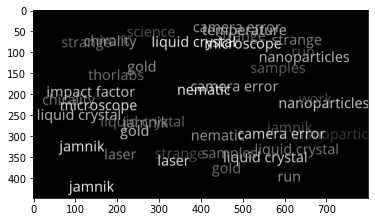

In [95]:
plt.imshow(generate_random_image())

## Camera test

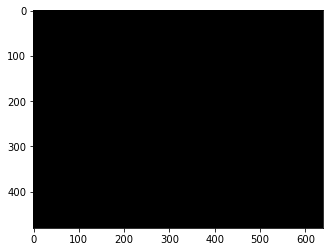

In [71]:
# Open the device at the ID 0 
cap = cv2.VideoCapture(0)

#Check whether user selected camera is opened successfully.

if not (cap.isOpened()):
    print('Could not open video device')
    
else:
    ret, frame = cap.read()
    
#     start_point = (int(640/2), int(480/2) -20)
#     end_point = (int(640/2), int(480/2) +20)
#     frame = cv2.line(frame, start_point, end_point, (0, 0, 255), 2)
    
#     start_point = (int(640/2)-20, int(480/2))
#     end_point = (int(640/2)+20, int(480/2))
#     frame = cv2.line(frame, start_point, end_point, (0, 0, 255), 2)
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    
# cap.release()

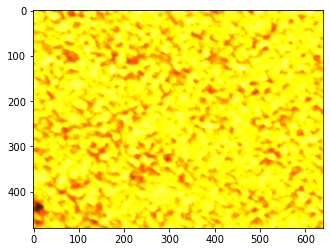

In [74]:
ret, frame = cap.read()
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [75]:
rgb.shape

(480, 640, 3)

448, 800 is the correct shape

In [49]:
resized = cv2.resize(rgb, (800, 448))

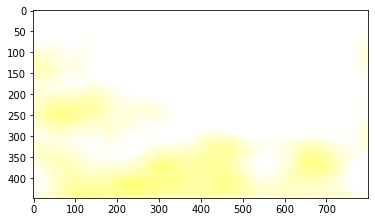

In [50]:
plt.imshow(resized)

In [77]:
params = [cv2.CAP_PROP_CONTRAST,
cv2.CAP_PROP_SATURATION,
cv2.CAP_PROP_EXPOSURE,
cv2.CAP_PROP_AUTO_EXPOSURE,
cv2.CAP_PROP_GAIN,
cv2.CAP_PROP_BRIGHTNESS,
cv2.CAP_PROP_FRAME_WIDTH,          
cv2.CAP_PROP_FRAME_HEIGHT
]

names = ['cv2.CAP_PROP_CONTRAST',
'cv2.CAP_PROP_SATURATION',
'cv2.CAP_PROP_EXPOSURE',
'cv2.CAP_PROP_AUTO_EXPOSURE',
'cv2.CAP_PROP_GAIN',
'cv2.CAP_PROP_BRIGHTNESS',
'cv2.CAP_PROP_FRAME_WIDTH',
'cv2.CAP_PROP_FRAME_HEIGHT']


for i in range(0, len(names)):
    result = cap.get(params[i])
    print('%s: %d'%(names[i], result))

cv2.CAP_PROP_CONTRAST: 10
cv2.CAP_PROP_SATURATION: -1
cv2.CAP_PROP_EXPOSURE: -4
cv2.CAP_PROP_AUTO_EXPOSURE: -1
cv2.CAP_PROP_GAIN: 10
cv2.CAP_PROP_BRIGHTNESS: 50
cv2.CAP_PROP_FRAME_WIDTH: 640
cv2.CAP_PROP_FRAME_HEIGHT: 480


In [82]:
parameter = cv2.CAP_PROP_FRAME_WIDTH 
cap.get(parameter)

640.0

In [81]:
cap.set(parameter, 800.0)

True

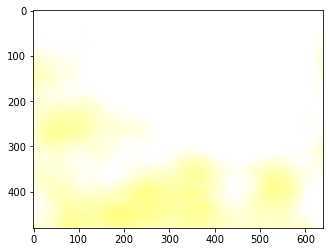

In [66]:
ret, frame = cap.read()
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [84]:
cap.release()

In [90]:
cap.release()

In [14]:
zero_frame = np.zeros((448, 800, 3))

In [23]:
plt.imshow(cv2.cvtColor(zero_frame, cv2.COLOR_BGR2RGBA))

error: OpenCV(4.0.1) c:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.hpp:261: error: (-2:Unspecified error) in function '__cdecl cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<3,4,-1>,struct cv::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [21]:
out_file = 'jupyter_Video_test.avi'

fourcc = cv2.VideoWriter_fourcc(*'XVID')
video_writer = cv2.VideoWriter(out_file, cv2.VideoWriter_fourcc(*'XVID'), 20, (800, 448))

for i in range(0, 100):
    video_writer.write(frame)
    
video_writer.release()


os.path.getsize(out_file)

2214876

## pyueye

In [2]:
from pyueye import ueye
import ctypes
import sys

In [3]:
#Variables
hCam = ueye.HIDS(0)             #0: first available camera;  1-254: The camera with the specified camera ID
sInfo = ueye.SENSORINFO()
cInfo = ueye.CAMINFO()
pcImageMemory = ueye.c_mem_p()
MemID = ueye.int()
rectAOI = ueye.IS_RECT()
pitch = ueye.INT()
nBitsPerPixel = ueye.INT(24)    #24: bits per pixel for color mode; take 8 bits per pixel for monochrome
channels = 3                    #3: channels for color mode(RGB); take 1 channel for monochrome
m_nColorMode = ueye.INT()		# Y8/RGB16/RGB24/REG32
bytes_per_pixel = int(nBitsPerPixel / 8)
#---------------------------------------------------------------------------------------------------------------------------------------
print("START")

START


In [4]:
nRet = ueye.is_InitCamera(hCam, None)
if nRet != ueye.IS_SUCCESS:
    print("is_InitCamera ERROR")

In [5]:
# Reads out the data hard-coded in the non-volatile camera memory and writes it to the data structure that cInfo points to
nRet = ueye.is_GetCameraInfo(hCam, cInfo)
if nRet != ueye.IS_SUCCESS:
    print("is_GetCameraInfo ERROR")

In [6]:
# You can query additional information about the sensor type used in the camera
nRet = ueye.is_GetSensorInfo(hCam, sInfo)
if nRet != ueye.IS_SUCCESS:
    print("is_GetSensorInfo ERROR")

In [7]:
nRet = ueye.is_ResetToDefault( hCam)
if nRet != ueye.IS_SUCCESS:
    print("is_ResetToDefault ERROR")

In [8]:
# Set display mode to DIB
nRet = ueye.is_SetDisplayMode(hCam, ueye.IS_SET_DM_DIB)

In [9]:
# Set the right color mode
if int.from_bytes(sInfo.nColorMode.value, byteorder='big') == ueye.IS_COLORMODE_BAYER:
    # setup the color depth to the current windows setting
    ueye.is_GetColorDepth(hCam, nBitsPerPixel, m_nColorMode)
    bytes_per_pixel = int(nBitsPerPixel / 8)
    print("IS_COLORMODE_BAYER: ", )
    print("\tm_nColorMode: \t\t", m_nColorMode)
    print("\tnBitsPerPixel: \t\t", nBitsPerPixel)
    print("\tbytes_per_pixel: \t\t", bytes_per_pixel)
    print()

elif int.from_bytes(sInfo.nColorMode.value, byteorder='big') == ueye.IS_COLORMODE_CBYCRY:
    # for color camera models use RGB32 mode
    m_nColorMode = ueye.IS_CM_BGRA8_PACKED
    nBitsPerPixel = ueye.INT(32)
    bytes_per_pixel = int(nBitsPerPixel / 8)
    print("IS_COLORMODE_CBYCRY: ", )
    print("\tm_nColorMode: \t\t", m_nColorMode)
    print("\tnBitsPerPixel: \t\t", nBitsPerPixel)
    print("\tbytes_per_pixel: \t\t", bytes_per_pixel)
    print()

elif int.from_bytes(sInfo.nColorMode.value, byteorder='big') == ueye.IS_COLORMODE_MONOCHROME:
    # for color camera models use RGB32 mode
    m_nColorMode = ueye.IS_CM_MONO8
    nBitsPerPixel = ueye.INT(8)
    bytes_per_pixel = int(nBitsPerPixel / 8)
    print("IS_COLORMODE_MONOCHROME: ", )
    print("\tm_nColorMode: \t\t", m_nColorMode)
    print("\tnBitsPerPixel: \t\t", nBitsPerPixel)
    print("\tbytes_per_pixel: \t\t", bytes_per_pixel)
    print()

else:
    # for monochrome camera models use Y8 mode
    m_nColorMode = ueye.IS_CM_MONO8
    nBitsPerPixel = ueye.INT(8)
    bytes_per_pixel = int(nBitsPerPixel / 8)
    print("else")

IS_COLORMODE_BAYER: 
	m_nColorMode: 		 0
	nBitsPerPixel: 		 32
	bytes_per_pixel: 		 4



In [10]:
# Can be used to set the size and position of an "area of interest"(AOI) within an image
nRet = ueye.is_AOI(hCam, ueye.IS_AOI_IMAGE_GET_AOI, rectAOI, ueye.sizeof(rectAOI))
if nRet != ueye.IS_SUCCESS:
    print("is_AOI ERROR")

width = rectAOI.s32Width
height = rectAOI.s32Height

In [11]:
# Prints out some information about the camera and the sensor
print("Camera model:\t\t", sInfo.strSensorName.decode('utf-8'))
print("Camera serial no.:\t", cInfo.SerNo.decode('utf-8'))
print("Maximum image width:\t", width)
print("Maximum image height:\t", height)
print()

Camera model:		 UI358xCP-C
Camera serial no.:	 4104074721
Maximum image width:	 2560
Maximum image height:	 1920



In [12]:
# Allocates an image memory for an image having its dimensions defined by width and height and its color depth defined by nBitsPerPixel
nRet = ueye.is_AllocImageMem(hCam, width, height, nBitsPerPixel, pcImageMemory, MemID)
if nRet != ueye.IS_SUCCESS:
    print("is_AllocImageMem ERROR")
else:
    # Makes the specified image memory the active memory
    nRet = ueye.is_SetImageMem(hCam, pcImageMemory, MemID)
    if nRet != ueye.IS_SUCCESS:
        print("is_SetImageMem ERROR")
    else:
        # Set the desired color mode
        nRet = ueye.is_SetColorMode(hCam, m_nColorMode)

In [13]:
# Activates the camera's live video mode (free run mode)
nRet = ueye.is_CaptureVideo(hCam, ueye.IS_DONT_WAIT)
if nRet != ueye.IS_SUCCESS:
    print("is_CaptureVideo ERROR")

# Enables the queue mode for existing image memory sequences
nRet = ueye.is_InquireImageMem(hCam, pcImageMemory, MemID, width, height, nBitsPerPixel, pitch)
if nRet != ueye.IS_SUCCESS:
    print("is_InquireImageMem ERROR")
else:
    print("Press q to leave the programm")


Press q to leave the programm


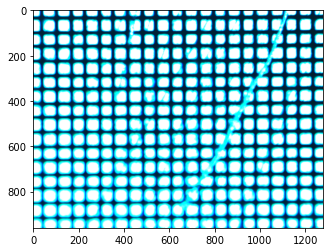

In [19]:
# In order to display the image in an OpenCV window we need to...
# ...extract the data of our image memory
array = ueye.get_data(pcImageMemory, width, height, nBitsPerPixel, pitch, copy=False)

# bytes_per_pixel = int(nBitsPerPixel / 8)

# ...reshape it in an numpy array...
frame = np.reshape(array,(height.value, width.value, bytes_per_pixel))

# ...resize the image by a half
frame = cv2.resize(frame,(0,0),fx=0.5, fy=0.5)

#---------------------------------------------------------------------------------------------------------------------------------------
#Include image data processing here

#---------------------------------------------------------------------------------------------------------------------------------------

#...and finally display it
# cv2.imshow("SimpleLive_Python_uEye_OpenCV", frame)
plt.imshow(frame[:,:,:3])

In [20]:
w, h = frame.shape[1], frame.shape[0]

In [21]:
w,h

(1280, 960)

In [22]:
frame.shape

(960, 1280, 4)

In [30]:
# res_frame = cv2.resize(frame, (int(w*(448/800)), 448))
res_frame = cv2.resize(frame, (int(w*448/h), 448))

(448, 597, 4)


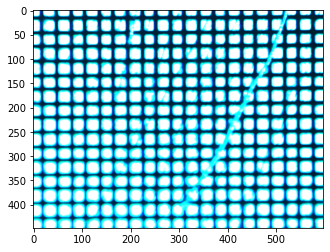

In [31]:
plt.imshow(res_frame[:,:,:3])
print(res_frame.shape)

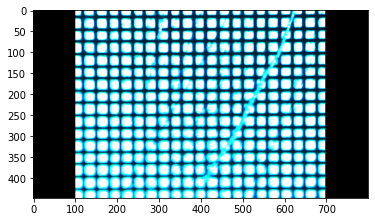

In [32]:
final_img = np.zeros((448, 800, 4), dtype = np.ubyte)
pos_x = int((800-res_frame.shape[1])/2)
final_img[:, pos_x:pos_x + res_frame.shape[1], :] = res_frame
plt.imshow(final_img[:,:,:3])

In [35]:
final_img.shape

(448, 800, 4)

In [21]:
frame.dtype

dtype('uint8')

In [22]:
448/800

0.56

In [149]:
# check frametime range

minV = ueye.double()
maxV = ueye.double()
inter = ueye.double()

ueye.is_GetFrameTimeRange(hCam, minV, maxV, inter)

print(minV.value)
print(maxV.value)
print(inter.value)

0.07576581333398932
0.15272509222354455
3.849888888922222e-05


In [148]:
# check pixel clock
number = ueye.UINT()
ret = ueye.is_PixelClock(hCam, ueye.IS_PIXELCLOCK_CMD_GET, number, ueye.sizeof(number))
print('Current PxCLK #:',ret, number)

PCrange = (ctypes.c_uint * 3)()
ret = ueye.is_PixelClock(hCam, ueye.IS_PIXELCLOCK_CMD_GET_RANGE, PCrange, 3*ueye.sizeof(number))
print('PxCLK range:', ret, PCrange[0], PCrange[1], PCrange[2])

ret = ueye.is_PixelClock(hCam, ueye.IS_PIXELCLOCK_CMD_GET_DEFAULT, number, ueye.sizeof(number))
print('PxCLK default:',ret, number)

Current PxCLK #: 0 90
PxCLK range: 0 5 104 0
PxCLK default: 0 24


In [140]:
# setting pixel clock

ret = ueye.is_PixelClock(hCam, ueye.IS_PIXELCLOCK_CMD_SET, ueye.UINT(24), ueye.sizeof(number))
print('PxCLK set:',ret, number)

PxCLK set: 0 24


In [142]:
disable = ueye.DOUBLE(0)
enable = ueye.DOUBLE(1)
zero = ueye.DOUBLE(0)
ms = ueye.DOUBLE(20)
rate = ueye.DOUBLE(50)
newrate = ueye.DOUBLE()
number = ueye.UINT()


ret = ueye.is_SetFrameRate(hCam, rate, newrate);
print('FR:',ret,newrate)
ret = ueye.is_Exposure(hCam, ueye.IS_EXPOSURE_CMD_GET_EXPOSURE, ms, ueye.sizeof(ms));
print('EXP:',ret,ms)
ret = ueye.is_PixelClock(hCam, ueye.IS_PIXELCLOCK_CMD_GET_NUMBER, number, ueye.sizeof(number))
print('PxCLK #:',ret, number)
PCrange = (ctypes.c_uint * 3)()
ret = ueye.is_PixelClock(hCam, ueye.IS_PIXELCLOCK_CMD_GET_RANGE, PCrange, 3*ueye.sizeof(number))
print('PxCLK range:', ret, PCrange[0], PCrange[1], PCrange[2])
list_pixel_clocks = (ctypes.c_uint * 150)()
ret = ueye.is_PixelClock(hCam, ueye.IS_PIXELCLOCK_CMD_GET_LIST,  list_pixel_clocks, number*ueye.sizeof(number))
list_np = np.frombuffer(list_pixel_clocks, int)
print('PxCLK list:', ret, list_np[0:number.value])
ret = ueye.is_PixelClock(hCam, ueye.IS_PIXELCLOCK_CMD_GET, number, ueye.sizeof(number))
print('PxCLK current:',ret, number)
ret = ueye.is_PixelClock(hCam, ueye.IS_PIXELCLOCK_CMD_GET_DEFAULT, number, ueye.sizeof(number))
print('PxCLK default:',ret, number)
ret = ueye.is_PixelClock(hCam, ueye.IS_PIXELCLOCK_CMD_SET, ueye.UINT(90), ueye.sizeof(number))
print('PxCLK set:',ret, number)
ret = ueye.is_PixelClock(hCam, ueye.IS_PIXELCLOCK_CMD_GET, number, ueye.sizeof(number))
print('PxCLK current:',ret, number)

FR: 0 11.732396243278997
EXP: 0 85.08162015073688
PxCLK #: 0 72
PxCLK range: 0 5 104 0
PxCLK list: 0 [  5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  52  54  56  58  60  62  64  66
  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 104]
PxCLK current: 0 80
PxCLK default: 0 24
PxCLK set: 0 24
PxCLK current: 0 90


In [153]:
# get fps
fps = ueye.double()

ret = ueye.is_GetFramesPerSecond(hCam, fps)

print(ret, fps)

0 13.202923655414255


In [152]:
# change fps
fps = ueye.double(20)
fps_actual = ueye.double()

ret = ueye.is_SetFrameRate (hCam, fps, fps_actual)

print(ret, fps, fps_actual)


0 20.0 13.19856484073919


In [72]:
print(pParam)

49.92967179376582


In [60]:
expo = -1

In [154]:
pParam = ueye.double()
ueye.is_Exposure(hCam, ueye.IS_EXPOSURE_CMD_GET_EXPOSURE, pParam, 8)
time.sleep(0.1)
pParam.value = pParam.value + 5*expo
ueye.is_Exposure(hCam, ueye.IS_EXPOSURE_CMD_SET_EXPOSURE, pParam, 8)
time.sleep(0.1)
ueye.is_Exposure(hCam, ueye.IS_EXPOSURE_CMD_GET_EXPOSURE, pParam, 8)
print('New camera expo is', pParam.value)

NameError: name 'expo' is not defined

In [19]:
# Releases an image memory that was allocated using is_AllocImageMem() and removes it from the driver management
ueye.is_FreeImageMem(hCam, pcImageMemory, MemID)

# Disables the hCam camera handle and releases the data structures and memory areas taken up by the uEye camera
ueye.is_ExitCamera(hCam)

# Destroys the OpenCv windows
cv2.destroyAllWindows()

## Imshow

In [3]:
while(True): 
    # Capture frame-by-frame


    # Display the resulting frame
    try:
        ret, frame = cap.read()
        
        start_point = (int(640/2), int(480/2) -20)
        end_point = (int(640/2), int(480/2) +20)
        frame = cv2.line(frame, start_point, end_point, (225, 5, 5), 2)

        start_point = (int(640/2)-20, int(480/2))
        end_point = (int(640/2)+20, int(480/2))
        frame = cv2.line(frame, start_point, end_point, (225, 5, 5), 2)
        
        cv2.imshow('preview',frame)
    except:
        print('bym sie wykraszowal')
        break

    #Waits for a user input to quit the application

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

## Tkinter cam

In [17]:
class GUI(Frame):

    def __init__(self, master=None):
        Frame.__init__(self, master)
        w,h = 650, 650
#         master.minsize(width=w, height=h)
#         master.maxsize(width=w, height=h)
        master.geometry("%dx%d+0+0" % (512+20, 512+20))
        self.pack()
        
        cap = cv2.VideoCapture(2)
        ret, frame = cap.read()
        main_img = ImageTk.PhotoImage(image=Image.fromarray(frame))

        self.main_img = ImageTk.PhotoImage(image=Image.fromarray(frame))
        self.img_label = Label(image = self.main_img)
        self.img_label.pack()
        
        self.update_image2()
        
    def update_image2(self):
#         global main_img
        cap = cv2.VideoCapture(2)
        ret, frame = cap.read()
        main_img = ImageTk.PhotoImage(image=Image.fromarray(frame))

        self.main_img = ImageTk.PhotoImage(image=Image.fromarray(frame))
        self.img_label.configure(image = self.main_img)
#         self.img_label.pack()
        self.img_label.after(10, self.update_image2)
        
        
root = Tk()
app = GUI(master=root)
app.mainloop()
# root.destroy()

## Tkinter2 (working)

In [2]:
# import Tkinter as tk
import cv2
from PIL import Image, ImageTk

width, height = 800, 600
cap = cv2.VideoCapture(2)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)

def save_img():
    global save_image
    save_image = True
    
def show_frame():
    global save_image
    
    _, frame = cap.read()
    frame = cv2.flip(frame, 1)
    cv2image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    img = Image.fromarray(cv2image)
    imgtk = ImageTk.PhotoImage(image=img)
    lmain.imgtk = imgtk
    lmain.configure(image=imgtk)
    
    if save_image == True:
        img.save('temp.png')
        save_image = False   
    lmain.after(10, show_frame)

save_image = False

root = Tk()
root.bind('<Escape>', lambda e: root.quit())
lmain = Label(root)
lmain.pack()

buttonSave = Button(root, text = 'Save', command = save_img)
buttonSave.pack()

show_frame()
root.mainloop()

In [7]:
all_files = os.listdir(os.getcwd() + '/saved_images/')

['temp.png']

## Illumination programs

In [4]:
import pandas as pd
import os

In [7]:
os.listdir('illumination_programs')

['better_program.xlsx', 'program1.txt', 'program_creator.xlsx', 'readme.txt']

In [23]:
program_df = pd.read_excel('illumination_programs/better_program.xlsx', engine='openpyxl', 
                          names = ['X', 'Y', 'Laser power [%]', 'Ill. Time [s]', 'Pattern file'])

In [27]:
for i in range(0, len(program_df)):
    print(program_df.iloc[i]['X'])
    print('-'*50)

0
--------------------------------------------------
0
--------------------------------------------------
2
--------------------------------------------------
2
--------------------------------------------------


## Another

In [5]:
class GUI(Frame):

    def __init__(self, master=None):
        Frame.__init__(self, master)
        w,h = 650, 650
#         master.minsize(width=w, height=h)
#         master.maxsize(width=w, height=h)
        master.geometry("%dx%d+0+0" % (512+20, 512+20))
        self.pack()
        
        cap = cv2.VideoCapture(2)
        ret, frame = cap.read()
        self.main_img = ImageTk.PhotoImage(image=Image.fromarray(frame))
        
        self.canvas = Canvas(root, width = 512, height = 512)
        self.canvas.create_image(0, 0, image = self.main_img, anchor = NW)
        self.canvas.pack()
        self.update_image2()
        
    def update_image2(self):
#         global main_img
        cap = cv2.VideoCapture(2)
        ret, frame = cap.read()

        self.main_img = ImageTk.PhotoImage(image=Image.fromarray(frame))
        self.canvas.create_image(0, 0, image = self.main_img, anchor = NW)
        self.canvas.after(5, self.update_image2)
        
        
root = Tk()
app = GUI(master=root)
app.mainloop()

TclError: image "pyimage4" doesn't exist

In [2]:
a = list(10*[0])

In [4]:
len(a)

10